In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
#导入工具包

In [7]:
# loading data
data = np.loadtxt('data1.txt',delimiter=',')
print(data.shape)
num_feature = data.shape[1] - 1
data = data.astype('float32')
#导入数据，查看数据形式

(47, 3)


In [8]:
# data normalization
data_norm = data.copy()
maximum = np.max(data_norm,axis=0,keepdims=True)
print(maximum)
minimun = np.min(data_norm,axis=0,keepdims=True)
data_norm = (data_norm - minimun)/(maximum - minimun)
print(data_norm)

[[4.478e+03 5.000e+00 6.999e+05]]
[[0.34528404 0.5        0.43396226]
 [0.20628792 0.5        0.3018868 ]
 [0.42691672 0.5        0.3756604 ]
 [0.1555433  0.25       0.11716981]
 [0.59238833 0.75       0.6981132 ]
 [0.31246552 0.75       0.24528302]
 [0.18808605 0.5        0.2735849 ]
 [0.15857695 0.5        0.05490377]
 [0.145615   0.5        0.07943396]
 [0.1770546  0.5        0.13698113]
 [0.30005515 0.75       0.13226226]
 [0.31660232 0.5        0.33415094]
 [0.28626585 0.5        0.3020736 ]
 [1.         1.         1.        ]
 [0.11472698 0.5        0.16981132]
 [0.39933813 0.75       0.5283019 ]
 [0.12906784 0.25       0.24528302]
 [0.10590182 0.5        0.05660377]
 [0.484556   0.75       0.6228264 ]
 [0.60093766 0.75       0.80962265]
 [0.2523442  0.5        0.15660377]
 [0.2857143  0.25       0.16056603]
 [0.20739107 0.5        0.13773584]
 [0.30612245 0.75       0.16981132]
 [0.8378378  0.5        0.76226413]
 [0.06839493 0.5        0.1509434 ]
 [0.16712631 0.5        0.5558

In [11]:
# train val split
data_train, data_test = train_test_split(data_norm, test_size=0.3, random_state=254)
X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
y_train = data_train[:, 2]
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2]

print(X_train)

[[0.49227798 0.5        1.        ]
 [0.34528404 0.5        1.        ]
 [0.9274683  0.75       1.        ]
 [0.28626585 0.5        1.        ]
 [0.36127964 0.75       1.        ]
 [0.26447877 0.75       1.        ]
 [0.1770546  0.5        1.        ]
 [0.48455599 0.75       1.        ]
 [0.59238833 0.75       1.        ]
 [0.1613348  0.5        1.        ]
 [0.31246552 0.75       1.        ]
 [0.2857143  0.25       1.        ]
 [0.04081633 0.         1.        ]
 [0.35300606 0.75       1.        ]
 [0.46166575 0.5        1.        ]
 [0.10590182 0.5        1.        ]
 [0.22393823 0.25       1.        ]
 [0.30612245 0.75       1.        ]
 [0.1555433  0.25       1.        ]
 [0.3717595  0.5        1.        ]
 [0.11472698 0.5        1.        ]
 [0.06839493 0.5        1.        ]
 [0.09597352 0.5        1.        ]
 [0.30005515 0.75       1.        ]
 [0.         0.25       1.        ]
 [0.83783782 0.5        1.        ]
 [0.630171   0.5        1.        ]
 [0.15857695 0.5        1.  

In [30]:
# model init
w = np.random.rand(num_feature+1,1)

# gradient descent
def L2_loss(y_pred,y):
    return np.mean(np.square(y_pred-y))

iterations = 30000
lr = 0.1


In [31]:
log = []
for i in range(iterations):
    y_pred = np.matmul(X_train, w)
    term = lr*np.mean((y_pred-y_train.reshape(-1,1))*X_train, axis=0).reshape(-1,1)
    w -= term
    loss = L2_loss(y_pred,y_train)
    print('iter:{},loss:{}'.format(i,loss))
    log.append([i,loss])

iter:0,loss:1.2040731270871565
iter:1,loss:0.9118331547337204
iter:2,loss:0.6949811555644324
iter:3,loss:0.5340095196057036
iter:4,loss:0.41446731354026384
iter:5,loss:0.3256482740311374
iter:6,loss:0.25961938772708815
iter:7,loss:0.21050162011667056
iter:8,loss:0.1739373228296997
iter:9,loss:0.14669585126976
iter:10,loss:0.1263815109449967
iter:11,loss:0.1112172684670889
iter:12,loss:0.09988456093163105
iter:13,loss:0.09140464377682095
iter:14,loss:0.08505069749766898
iter:15,loss:0.080282712183656
iter:16,loss:0.07669924070761844
iter:17,loss:0.07400164526123573
iter:18,loss:0.07196759752609255
iter:19,loss:0.07043143351912354
iter:20,loss:0.06926958662473963
iter:21,loss:0.0683897832048059
iter:22,loss:0.06772302642282402
iter:23,loss:0.06721764659367187
iter:24,loss:0.06683488347148003
iter:25,loss:0.06654560444016336
iter:26,loss:0.06632786517734444
iter:27,loss:0.06616509535371567
iter:28,loss:0.06604474821428097
iter:29,loss:0.06595729457979208
iter:30,loss:0.06589547269260491
i

In [32]:
# normal eqution
term = np.matmul(X_train.T, X_train)
term_inv = np.linalg.inv(term)
w = np.matmul(np.matmul(term_inv,X_train.T),y_train.reshape(-1,1))
print(w)

[[ 0.92381489]
 [-0.10038498]
 [ 0.06381713]]


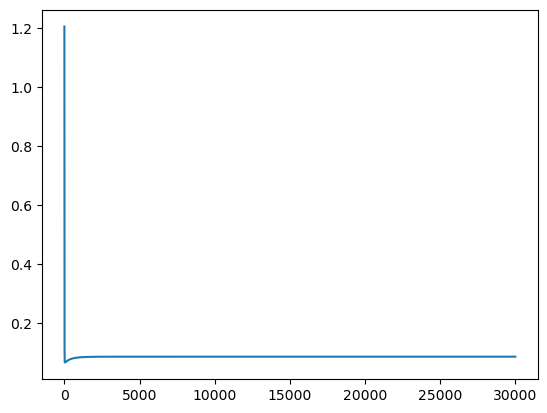

In [33]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

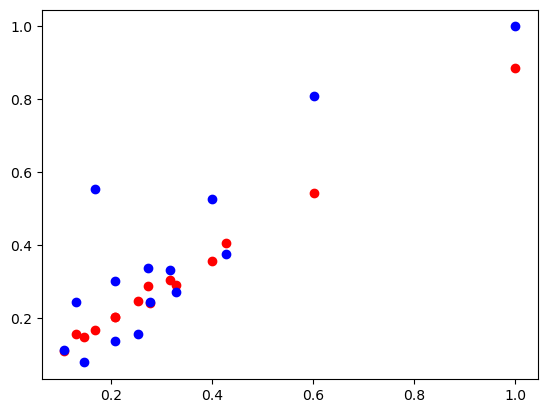

In [24]:
# visualization
y_pred = np.matmul(X_test, w)
plt.scatter(X_test[:,0],y_pred,c='r')
plt.scatter(X_test[:,0],y_test,c='b')

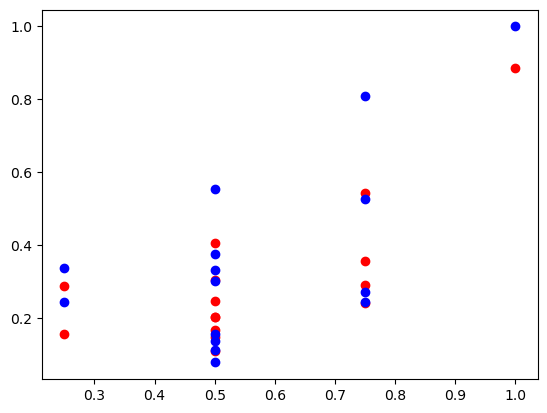

In [25]:
plt.scatter(X_test[:,1],y_pred,c='r')
plt.scatter(X_test[:,1],y_test,c='b')